In [59]:
import torch
from pathlib import Path
import requests
import zipfile
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [61]:
data_path = Path("/data")
image_path = data_path / "pizza_steak_sushi"

In [62]:
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # Download pizza, steak, sushi data

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)


/data/pizza_steak_sushi directory exists.


In [63]:

import os
def walk_through_dir(dir_path):
  total_test =0
  total_train =0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    if "test" in dirpath:
      total_test += len(filenames)
    if "train" in dirpath:
      total_train += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  return {"total_test":total_test, "total_trian":total_train}

# data exploratioin
walk_through_dir(image_path)





There are 2 directories and 0 images in '/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in '/data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in '/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in '/data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in '/data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in '/data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in '/data/pizza_steak_sushi/train/sushi'.


{'total_test': 75, 'total_trian': 225}

In [64]:
#  setup  train and test dir
train_dir = image_path / "train"
test_dir = image_path / "test"

(383, 512, 3)


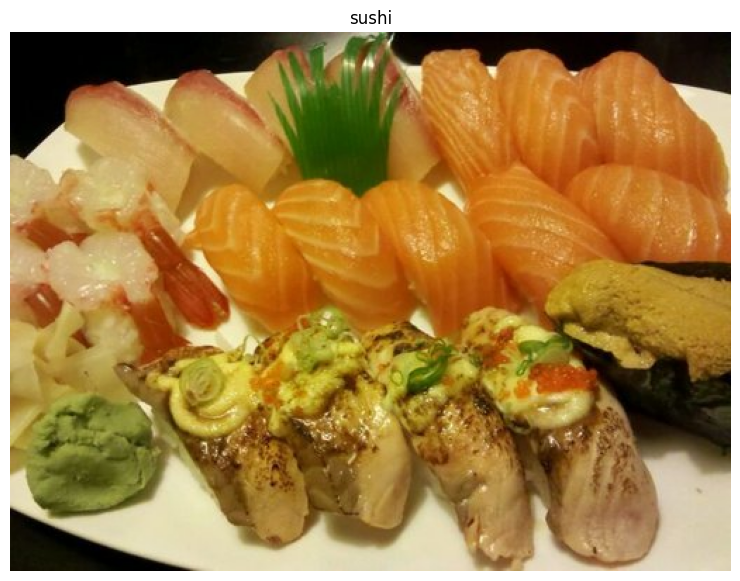

In [65]:
import os
import random
os.listdir(train_dir)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def random_image(dir_path,):
  target_folder = random.choice(os.listdir(dir_path))
  target_folder_path = dir_path / target_folder
  random_image_path = random.choice(os.listdir(target_folder_path))
  img = mpimg.imread(dir_path /target_folder/random_image_path)
  plt.figure(figsize=(10,7))
  print(img.shape)
  plt.imshow(img)
  plt.axis('off')
  plt.title(target_folder)  # Turn off axis labels
  plt.show()
# now we have to make the random images to show

random_image(train_dir)

In [66]:
from torchvision import datasets, transforms
from torchvision.transforms import v2
from torch.utils.data import DataLoader

In [67]:
# define image transformation
image_transforms = transforms.v2.Compose([
    # resize the images to 64 x 64
    transforms.v2.Resize((64,64)),
    # random horizontal flip
    transforms.v2.RandomHorizontalFlip(p=0.5),
    # convet the image to tensor
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])

# load datasets
train_dataset = datasets.ImageFolder(train_dir,
                                     transform=image_transforms,
                                     target_transform=None
                                     )
test_dataset = datasets.ImageFolder(test_dir,
                                    transform=image_transforms,
                                    target_transform=None
                                    )

print(train_dataset.classes)
print(train_dataset.class_to_idx)

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


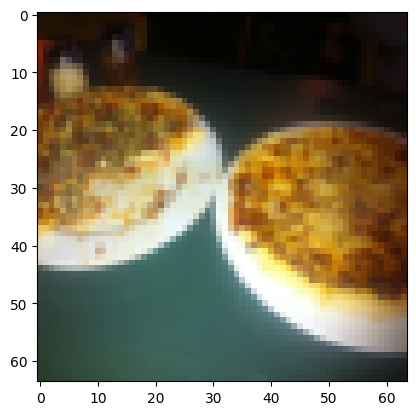

In [68]:
train_dataset[0][0].shape
# show this image
plt.imshow(train_dataset[0][0].permute(1,2,0))

In [69]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: /data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           )

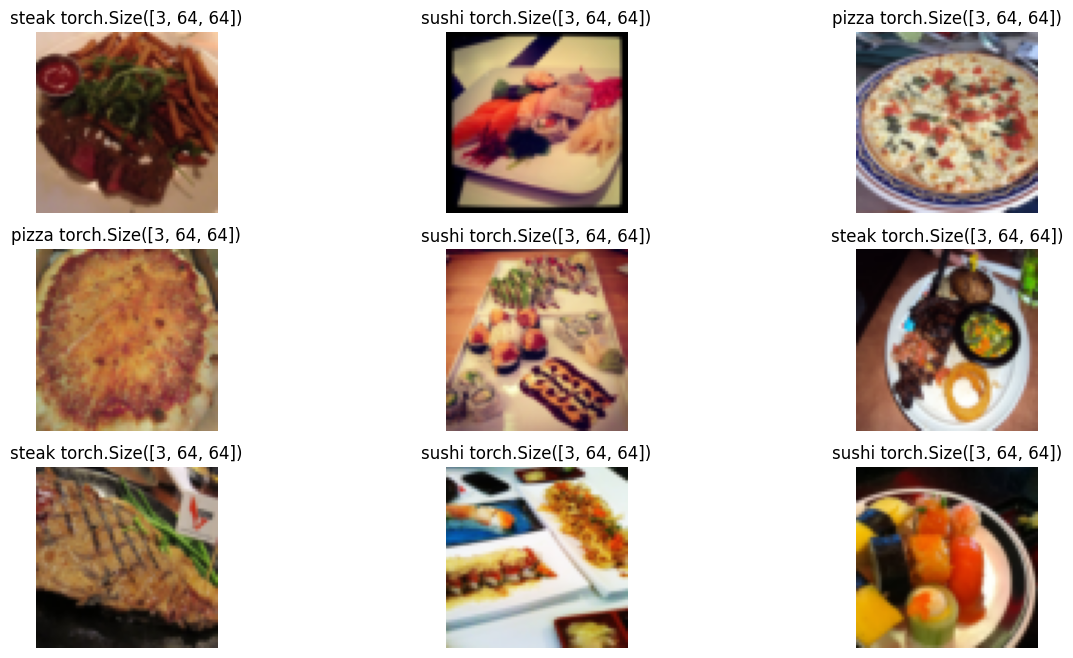

In [70]:
labels_map = {0:'pizza', 1:'steak', 2: 'sushi'}
figure = plt.figure(figsize=(15,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{labels_map[label]} {img.shape}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0)) # Permute the dimensions here
plt.show()

In [71]:
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [72]:
len(train_dataset), len(test_dataset)

(225, 75)

In [73]:
img, label = train_dataset[0][0],train_dataset[0][1]
img.device,img.dtype

(device(type='cpu'), torch.float32)

In [74]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
    )

In [75]:
len(train_loader),len(test_loader)

(8, 3)

In [76]:
image, label = next(iter(train_loader))
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([32, 3, 64, 64])
Label: tensor([1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2,
        1, 0, 1, 2, 0, 1, 0, 0])


Feature batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


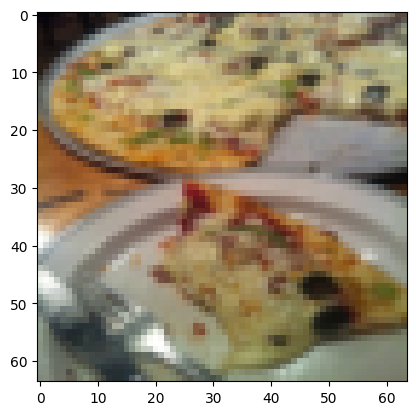

Label: pizza


In [77]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {class_names[label]}")

In [78]:
os.listdir(train_dir)
# train_dir
# train
  #pizza
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg
  #steak
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg
  #sushi
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg

['steak', 'pizza', 'sushi']

## Creating a Custom Dataset for your files

In [79]:
import os
from typing import Tuple, Dict, List

# now we have to find the name of the target and make
directory_path = test_dir


def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  class_name_found = []
  try:
      with os.scandir(directory_path) as entries:
          for entry in entries:
              if entry.is_file():
                  print(f"File: {entry.name} (Path: {entry.path})")
              elif entry.is_dir():
                  print(f"Directory: {entry.name} (Path: {entry.path})")
                  class_name_found.append(entry.name)
              else:
                  print(f"Other entry: {entry.name} (Path: {entry.path})")
  except FileNotFoundError:
      print(f"Error: Directory '{directory_path}' not found.")
  except Exception as e:
   print(f"An error occurred: {e}")
  class_name_found = sorted(class_name_found)
  class_to_idx = {cls_name: i for i, cls_name in enumerate(class_name_found)}
  return class_name_found, class_to_idx




In [80]:
# now we have to create our own dataset function to load the images from the folder
from torch.utils.data import Dataset
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
      # get all the images path
        self.images_path = list(Path(img_dir).glob("*/*.jpg"))
        # setup transform
        self.transform = transform
        # setup target_transform
        self.target_transform = target_transform
        self.classes, self.class_to_idx = find_classes(img_dir)

    def __len__(self)-> int:
        return len(self.images_path)

    def load_image(self, index:int):
      return decode_image(self.images_path[index])

    def __getitem__(self, idx:int)-> Tuple[torch.Tensor,int]:
        image = self.load_image(idx)
        label = self.class_to_idx[self.images_path[idx].parent.name]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label




In [81]:
train_data = CustomImageDataset(train_dir, transform=image_transforms)
test_data = CustomImageDataset(test_dir, transform=image_transforms)
print(train_data.class_to_idx)
print(train_data.classes)
train_data[0][0]

Directory: steak (Path: /data/pizza_steak_sushi/test/steak)
Directory: pizza (Path: /data/pizza_steak_sushi/test/pizza)
Directory: sushi (Path: /data/pizza_steak_sushi/test/sushi)
Directory: steak (Path: /data/pizza_steak_sushi/test/steak)
Directory: pizza (Path: /data/pizza_steak_sushi/test/pizza)
Directory: sushi (Path: /data/pizza_steak_sushi/test/sushi)
{'pizza': 0, 'steak': 1, 'sushi': 2}
['pizza', 'steak', 'sushi']


Image([[[0.1529, 0.1059, 0.0941,  ..., 0.8902, 0.8941, 0.9020],
        [0.0980, 0.0784, 0.0745,  ..., 0.9294, 0.8824, 0.8902],
        [0.0588, 0.0902, 0.0824,  ..., 0.9569, 0.8980, 0.8667],
        ...,
        [0.2353, 0.2471, 0.2392,  ..., 0.3765, 0.2824, 0.3059],
        [0.2235, 0.2353, 0.2510,  ..., 0.3451, 0.4471, 0.4196],
        [0.2824, 0.2235, 0.2314,  ..., 0.3765, 0.2980, 0.2078]],

       [[0.1294, 0.0941, 0.0745,  ..., 0.9490, 0.9451, 0.9490],
        [0.0863, 0.0784, 0.0667,  ..., 0.9725, 0.9373, 0.9451],
        [0.0627, 0.0902, 0.0784,  ..., 0.9922, 0.9529, 0.9373],
        ...,
        [0.1686, 0.1647, 0.1686,  ..., 0.4000, 0.3020, 0.3137],
        [0.1608, 0.1608, 0.1765,  ..., 0.3843, 0.4706, 0.4392],
        [0.1922, 0.1529, 0.1608,  ..., 0.4078, 0.3255, 0.2392]],

       [[0.0863, 0.0667, 0.0588,  ..., 0.9569, 0.9608, 0.9569],
        [0.0667, 0.0588, 0.0588,  ..., 0.9765, 0.9490, 0.9490],
        [0.0431, 0.0627, 0.0588,  ..., 0.9922, 0.9569, 0.9451],
        ..

torch.Size([3, 64, 64])


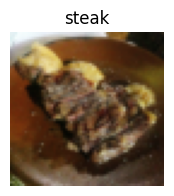

In [82]:
img_tensor, label = train_data[0] # Get the image tensor and label
plt.figure(figsize=(2,2))
print(img_tensor.shape)
plt.imshow(img_tensor.permute(1, 2, 0)) # Permute the dimensions for matplotlib
plt.title(train_data.classes[label]) # Add title using the label
plt.axis('off') # Turn off axis
plt.show()

In [83]:
list(Path(train_dir).glob("*/*.jpg"))[0]

PosixPath('/data/pizza_steak_sushi/train/steak/1961025.jpg')

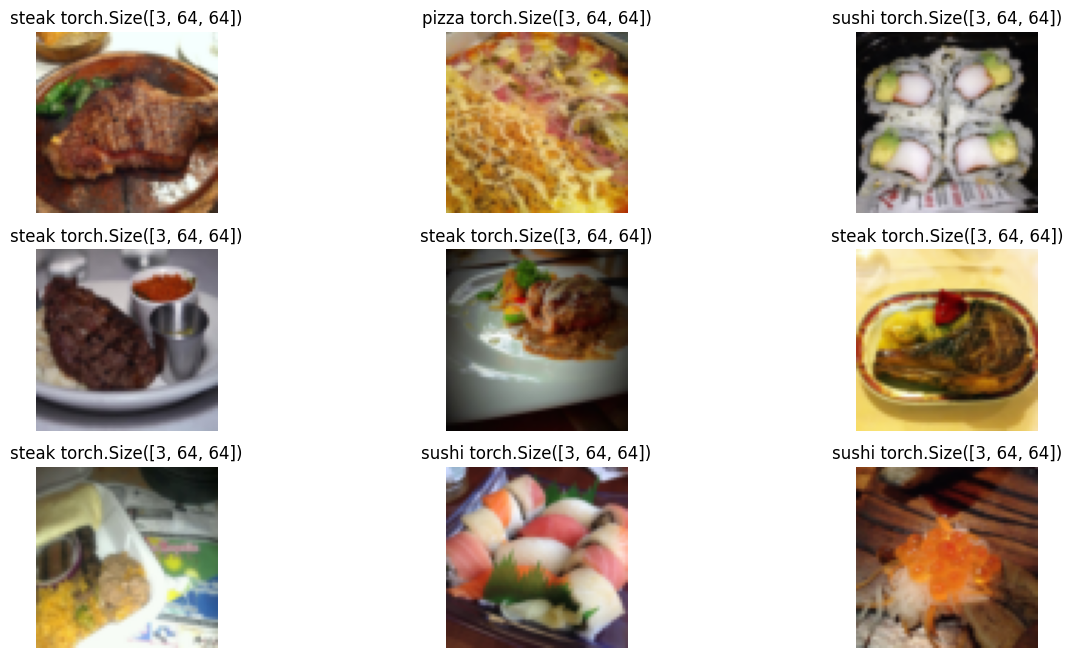

In [84]:
labels_map = {0:'pizza', 1:'steak', 2: 'sushi'}
figure = plt.figure(figsize=(15,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{labels_map[label]} {img.shape}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0)) # Permute the dimensions here
plt.show()

In [85]:
# DATA LOADER FOR CUSTOM TRAIN AND TEST DATA
train_dataloader = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_dataloader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
    )


In [86]:
image, label = next(iter(train_dataloader))
image.shape,label

(torch.Size([32, 3, 64, 64]),
 tensor([0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0,
         2, 2, 2, 0, 0, 2, 1, 0]))

In [87]:
image[0].shape

torch.Size([3, 64, 64])

Feature batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


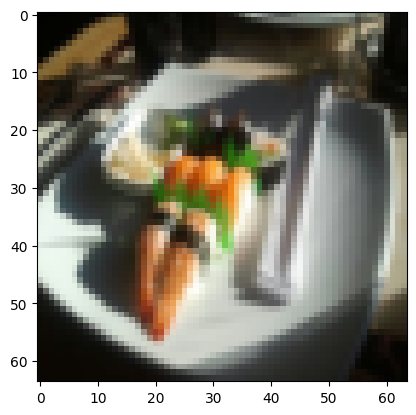

Label: sushi


In [88]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {class_names[label]}")

## Building our Base Model For Food Classification Problem

In [89]:
from torch import nn

In [90]:
# define image transformation
image_transforms = transforms.v2.Compose([
    transforms.v2.Resize((64,64)),
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])

# load datasets
train_dataset_sample = datasets.ImageFolder(train_dir,
                                     transform=image_transforms,
                                     target_transform=None
                                     )
test_dataset_sample = datasets.ImageFolder(test_dir,
                                    transform=image_transforms,
                                    target_transform=None
                                    )

train_dataloader_sample = DataLoader(
    train_dataset_sample,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_dataloader_sample = DataLoader(
    test_dataset_sample,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
  )



In [91]:
class TinyVGG16(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int ) -> None:
    super().__init__()
    self.flatten = nn.Flatten()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
    )

  def forward(self,x):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x



In [92]:

# creation of the model
torch.manual_seed(42)
model_0 = TinyVGG16(
    input_shape=3,
    hidden_units=10,
    output_shape=3
    ).to(device)
print(model_0)

TinyVGG16(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)


In [93]:
image,label= next(iter(train_dataloader_sample))


In [94]:
model_0(image.to(device)).shape

torch.Size([32, 3])

In [95]:
16*16*10

2560

## TorchInfo

In [96]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary

In [97]:
summary(model_0, input_size=image.shape)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG16                                [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

## Train and Test Function Implementation

In [98]:
!pip install torchmetrics

In [99]:

def train_loop(
    dataloader: DataLoader,
    model:nn.Module,
    loss_fn:nn.CrossEntropyLoss,
    optimizer:torch.optim.Optimizer,
    ):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    train_loss, train_acc = 0,0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        train_acc += (pred.argmax(dim=1) == y).sum().item() # Use accuracy as a callable and add .item()
        # Backpropagation
        loss.backward()
        optimizer.step()
        # optimizer.zero_grad()

      # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(dataloader)
    train_acc /= len(dataloader.dataset)
    return train_loss, train_acc




def test_loop(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred_logits, y).item()
            # we can also used softmax for this as well
            # logits are also good to calculated the accuracy of the model

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item())

        # Adjust metrics and print out
        # Adjust metrics to get average loss and accuracy per batch
        test_loss = test_loss / len(data_loader)
        test_acc = test_acc / len(data_loader.dataset)
        return test_loss, test_acc


In [100]:
from tqdm.auto import tqdm
# now we have to make the graph of the loss and accuracy of the model for each epoch when the model is training
def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5,# Corrected spelling here

):

 # 2. Create empty results dictionary
  results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc= test_loop(test_dataloader, model, loss_fn)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

     # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
  return results



In [101]:
# train

torch.manual_seed(42)
model_0 = TinyVGG16(
    input_shape=3,
    hidden_units=10,
    output_shape=3
    ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),  lr=1e-3)

model_0_history = train(
    model_0,
    train_dataloader_sample,
    test_dataloader_sample,
    optimizer,
    loss_fn,
    epochs=30
  )

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2933 | test_loss: 1.1362 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.3467 | test_loss: 1.1621 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.1155 | train_acc: 0.3333 | test_loss: 1.1699 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0979 | train_acc: 0.3333 | test_loss: 1.1356 | test_acc: 0.2533
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3333 | test_loss: 1.1430 | test_acc: 0.2533
Epoch: 6 | train_loss: 1.0950 | train_acc: 0.2933 | test_loss: 1.1479 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1191 | train_acc: 0.3733 | test_loss: 1.1431 | test_acc: 0.4133
Epoch: 8 | train_loss: 1.1023 | train_acc: 0.4133 | test_loss: 1.1063 | test_acc: 0.2800
Epoch: 9 | train_loss: 1.0890 | train_acc: 0.4133 | test_loss: 1.0686 | test_acc: 0.4133
Epoch: 10 | train_loss: 1.0671 | train_acc: 0.3200 | test_loss: 1.0170 | test_acc: 0.4133
Epoch: 11 | train_loss: 1.0347 | train_acc: 0.3511 | test_loss: 0.9716 | test_acc: 0.4933
Epoch: 12 | train_l

## Model Evaluation Matrix

In [102]:
# acc = history['train_acc']
# val_acc = history['test_acc']

# loss = history['train_loss']
# val_loss = history['test_loss']

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Testing Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.title('Training and Testing Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Testing Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.title('Training and Testing Loss')
# plt.xlabel('epoch')
# plt.show()


In [103]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


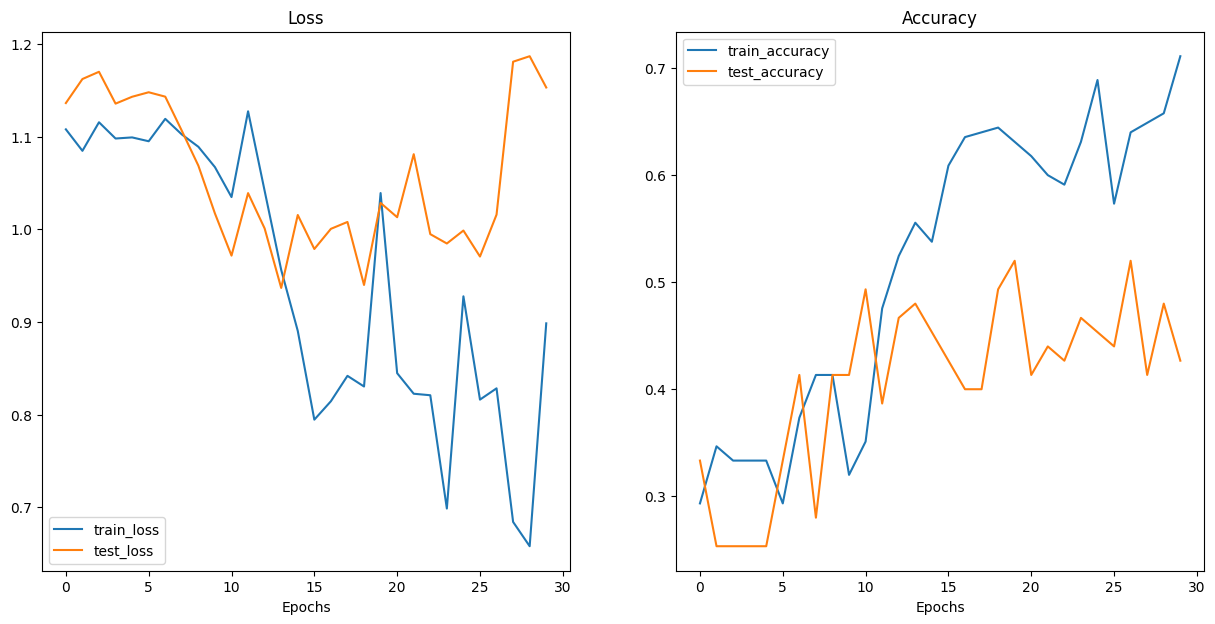

In [104]:
plot_loss_curves(model_0_history)

### Over Model Is overfitting
+ data augmentation to reduce model overfitting


In [105]:
train_image_transforms = transforms.v2.Compose([
    transforms.v2.Resize((64,64)),
    transforms.v2.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])


test_image_transforms = transforms.v2.Compose([
    transforms.v2.Resize((64,64)),
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])


# load datasets
train_dataset_sample = datasets.ImageFolder(train_dir,
                                     transform=train_image_transforms,
                                     target_transform=None
                                     )
test_dataset_sample = datasets.ImageFolder(test_dir,
                                    transform=test_image_transforms,
                                    target_transform=None
                                    )

train_dataloader_sample = DataLoader(
    train_dataset_sample,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_dataloader_sample = DataLoader(
    test_dataset_sample,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
  )



In [106]:
torch.manual_seed(42)
model_1 = TinyVGG16(
    input_shape=3,
    hidden_units=10,
    output_shape=3
    ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),  lr=1e-3)

model_1_history = train(
    model_1,
    train_dataloader_sample,
    test_dataloader_sample,
    optimizer,
    loss_fn,
    epochs=30
  )

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1070 | train_acc: 0.2933 | test_loss: 1.1390 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0829 | train_acc: 0.3467 | test_loss: 1.1684 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.1214 | train_acc: 0.3333 | test_loss: 1.1735 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0960 | train_acc: 0.3333 | test_loss: 1.1411 | test_acc: 0.2533
Epoch: 5 | train_loss: 1.0946 | train_acc: 0.3333 | test_loss: 1.1413 | test_acc: 0.2533
Epoch: 6 | train_loss: 1.0959 | train_acc: 0.3867 | test_loss: 1.1470 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1140 | train_acc: 0.4400 | test_loss: 1.1342 | test_acc: 0.3200
Epoch: 8 | train_loss: 1.0929 | train_acc: 0.3556 | test_loss: 1.0996 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.0848 | train_acc: 0.4711 | test_loss: 1.0772 | test_acc: 0.4933
Epoch: 10 | train_loss: 1.0706 | train_acc: 0.3778 | test_loss: 1.0533 | test_acc: 0.4667
Epoch: 11 | train_loss: 1.0505 | train_acc: 0.3689 | test_loss: 1.0225 | test_acc: 0.4667
Epoch: 12 | train_l

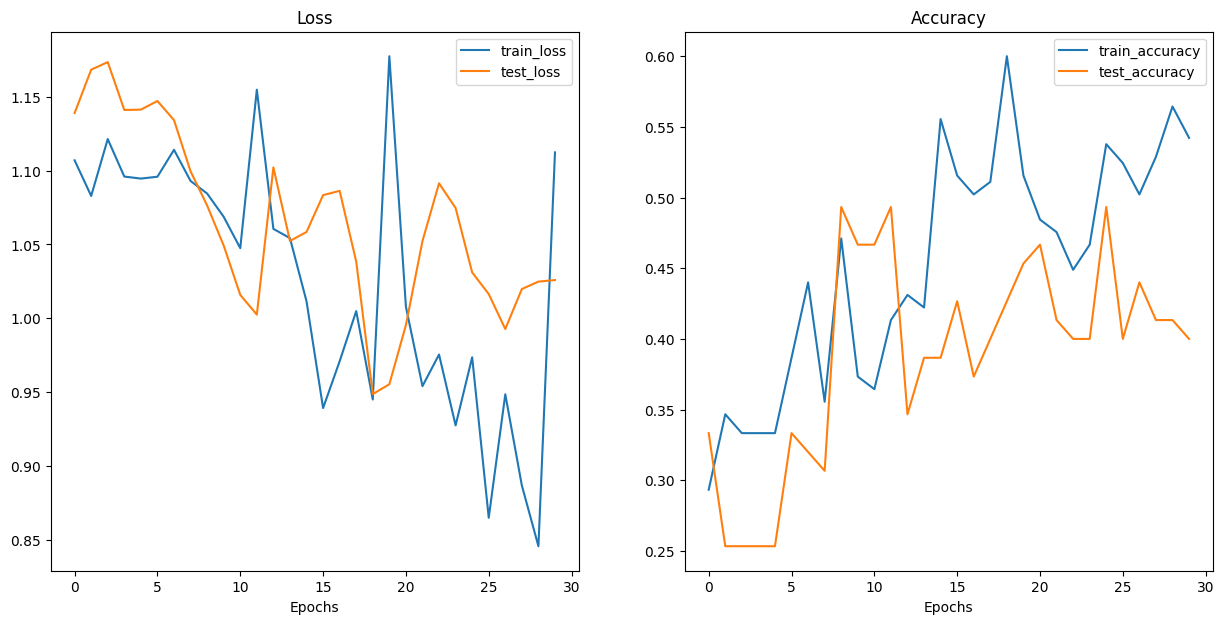

In [107]:
plot_loss_curves(history)

In [108]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_history)
model_1_df = pd.DataFrame(model_1_history)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106978,0.293333,1.138987,0.333333
1,1.082873,0.346667,1.168361,0.253333
2,1.121388,0.333333,1.173515,0.253333
3,1.095988,0.333333,1.141095,0.253333
4,1.094617,0.333333,1.141312,0.253333
5,1.095879,0.386667,1.147162,0.333333
6,1.114104,0.440000,1.134201,0.320000
7,1.093003,0.355556,1.099525,0.306667
8,1.084496,0.471111,1.076402,0.493333
9,1.068730,0.373333,1.049280,0.466667


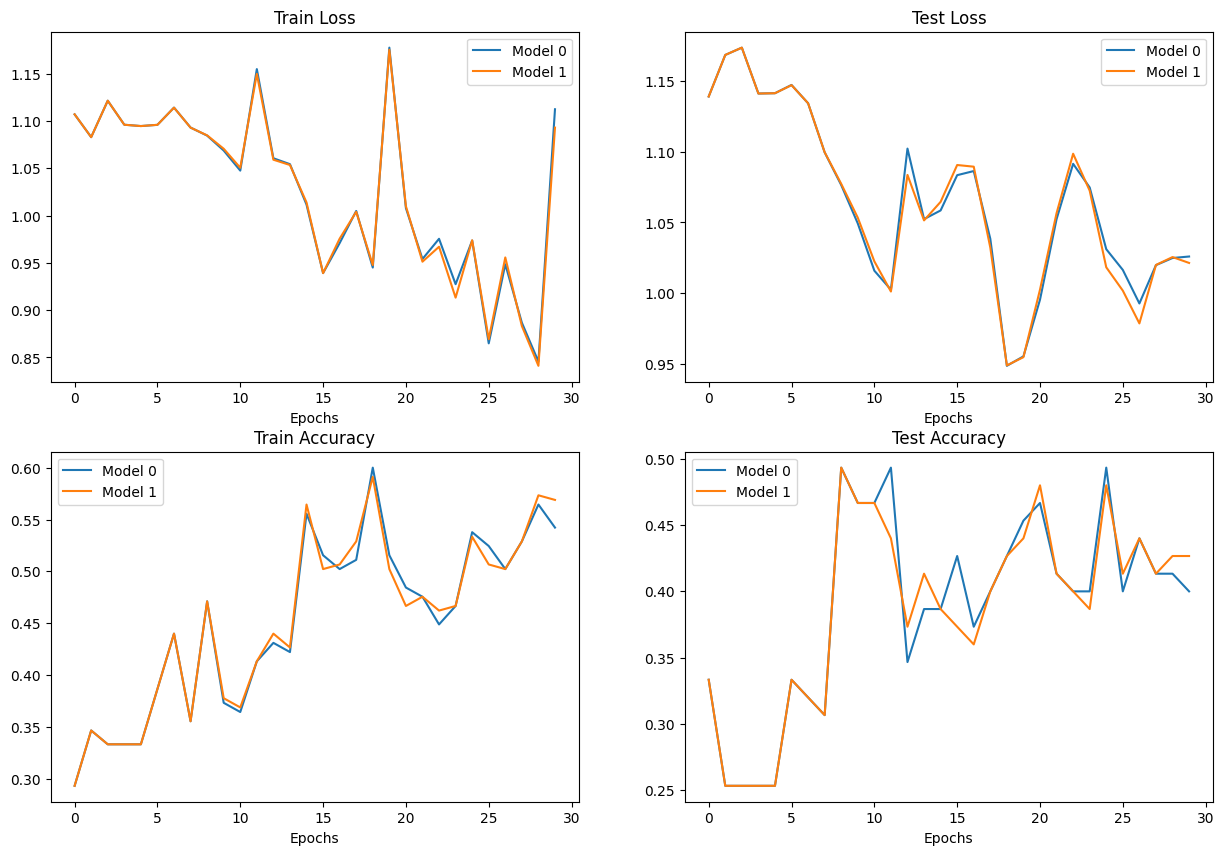

In [109]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();